### Task 2 + 3

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re

def clean_data(raw_text: str):
    text = raw_text.lower()

    text = re.sub(r'\n', ' ', text) # Remove newlines
    text = re.sub(r' +', ' ', text) # Remove multiple spaces

    text = re.sub(r'([a-zA-Z]+) (\d+)[, ]? (\d{4})', '<DATE>', text) # Date substitution
    text = re.sub(r'([.a-zA-Z0-9]+)@([-a-zA-Z0-9]+).([a-zA-Z]+)', '<EMAIL>', text) # E-Mail substitution
    text = re.sub(r'(https?:\/\/)?(www.)?([-.a-zA-Z0-9]+)[.](co.uk|com|org|net)\/?([\%\-\.\?\_=a-zA-Z0-9\/]+)?', '<URL>', text) # URL substitution
    text = re.sub(r'[0-9]+', '<NUM>', text) # Number substitution

    return text

In [3]:
news = pd.read_csv('995,000_rows.csv', usecols=['type','content'])
news = news.dropna()

In [4]:
omit_types = ['unreliable', 'unknown', 'rumor', 
              '2018-02-10 13:43:39.521661']

for omit_type in omit_types:
    news = news[news.type != omit_type]


In [5]:
news.head(995000)

,type,content
0,political,Plus one article on Google Plus\n\n(Thanks to ...
1,fake,The Cost Of The Best Senate Banking Committee ...
2,satire,Man Awoken From 27-Year Coma Commits Suicide A...
3,reliable,WHEN Julia Geist was asked to draw a picture o...
4,conspiracy,– 100 Compiled Studies on Vaccine Dangers (Act...
...,...,...
994992,reliable,The great thing about the phone camera is that...
994994,political,Plus one article on Google Plus\n\n(Thanks to ...
994995,conspiracy,By\n\n21WIRE + Intervention Watch | All we can...
994996,political,Plus one article on Google Plus\n\n(Thanks to ...


Text

In [6]:
news['content'] = news['content'].apply(clean_data)

In [7]:
news.head(10)

,type,content
0,political,plus one article on google plus (thanks to ali...
1,fake,the cost of the best senate banking committee ...
2,satire,man awoken from <NUM>-year coma commits suicid...
3,reliable,when julia geist was asked to draw a picture o...
4,conspiracy,– <NUM> compiled studies on vaccine dangers (a...
5,reliable,if you spend the majority of your waking hours...
6,political,disclaimer. this is general information on a l...
7,political,"a new report identifies <NUM> ""epicenters"" wor..."
9,bias,"dear readers, we are excited to announce that ..."
10,political,plus one article on google plus (thanks to ali...


Distribution of types

In [8]:
def count_types(article_types):
    found_types = {}

    for article_type in article_types:
        if article_type in found_types:
            found_types[article_type] += 1
        else:
            found_types[article_type] = 1

    return found_types

count_types(list(news['type']))

{'political': 194518,
 'fake': 104883,
 'satire': 13160,
 'reliable': 218563,
 'conspiracy': 97314,
 'bias': 133232,
 'clickbait': 27412,
 'hate': 8779,
 'junksci': 14040}

In [10]:
vocab = []

for content in news['content']:
    vocab.extend(nltk.word_tokenize(content))

vocab = [word for word in vocab if word.isalpha()]

In [9]:
def fake_credible(types: dict):
    labels = [0, 0]
    
    for type in types:
        if type in ['fake', 'satire', 'conspiracy', 'bias', 'hate', 'junksci']:
            labels[0] += types[type]
        elif type in ['clickbait', 'political', 'reliable']:
            labels[1] += types[type]

    return labels

fake_credible(count_types(list(news['type'])))

[371408, 440493]

In [11]:
def count_words(vocab):
    words = {}

    for word in vocab:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

    return words

In [12]:
sorted_vocab = {k: v for k, v in sorted(count_words(vocab).items(), key = lambda item: item[1], reverse=True)}

In [14]:
most_frequent_100 = dict(list(sorted_vocab.items())[:100])
most_frequent_100

{'the': 21823357,
 'of': 10470750,
 'to': 10289865,
 'and': 9502546,
 'a': 8224828,
 'NUM': 8017681,
 'in': 7205547,
 'that': 4781351,
 'is': 4193662,
 'for': 3610059,
 'it': 3023769,
 'on': 2873156,
 's': 2499914,
 'as': 2299325,
 'with': 2295558,
 'was': 2064515,
 'i': 2052448,
 'are': 2043698,
 'by': 1915802,
 'this': 1908983,
 'not': 1865347,
 'you': 1842943,
 'he': 1822080,
 'at': 1801653,
 'be': 1782186,
 'have': 1722748,
 'from': 1661368,
 'they': 1462998,
 'an': 1433289,
 'has': 1418612,
 'but': 1400882,
 'we': 1396723,
 'his': 1367240,
 'said': 1217858,
 'or': 1181936,
 'who': 1158125,
 'will': 1055866,
 'their': 1049403,
 'more': 972267,
 'all': 971073,
 'about': 932168,
 'one': 904620,
 'new': 896701,
 'which': 846139,
 'can': 833239,
 'would': 814239,
 'if': 811980,
 'what': 803043,
 'there': 778261,
 'were': 772506,
 'had': 772264,
 'up': 764949,
 'been': 758059,
 'people': 733056,
 'when': 702962,
 'our': 697804,
 'so': 692071,
 'out': 672357,
 'do': 652603,
 't': 638288,

In [16]:
print('Amount of URLS:', sorted_vocab['URL'])
print('Amount of Dates:', sorted_vocab['DATE'])
print('Amount of Numbers:', sorted_vocab['NUM'])
print('Amount of Emails:', sorted_vocab['EMAIL'])

Amount of URLS: 361975
Amount of Dates: 267167
Amount of Numbers: 8017681
Amount of Emails: 27242


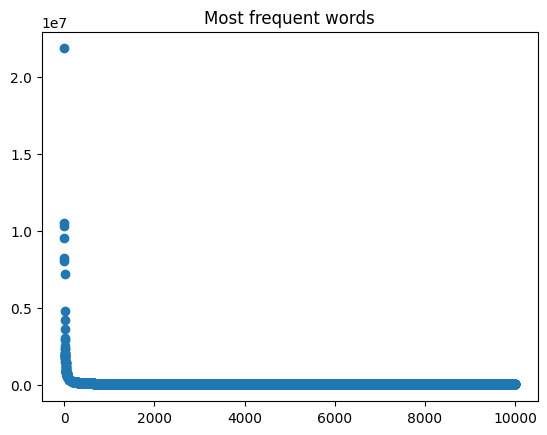

In [20]:
plt.figure()
plt.scatter(list(range(10000)), list(sorted_vocab.values())[:10000])
plt.title('Most frequent words')
plt.show()

The graph of most frequent words follow Zipf's law (which is a powerlaw)

### Task 4
We use the sklearn train_test_split function to split the data into the different sets